Importing Dependencies

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

Data Collection and processing

In [34]:
# loading the data from csv file to pandas dataframes
cd = pd.read_csv('car data.csv')

In [35]:
# inspecting the first 5 rows
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
# finding the number of rows and columns in dataframe
cd.shape

(301, 9)

In [37]:
# finding null values by getting complete information
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are no NULL values in dataframe

In [38]:
# checking the number of missing values
cd.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


There are no missing values in the dataframe

In [39]:
# checking the distribution of categorical data
print(cd.Fuel_Type.value_counts())
print(cd.Seller_Type.value_counts())
print(cd.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


we need to change the data from text to numbers for better understanding

In [40]:
# encoding "Fuel_Type" column
cd.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" column
cd.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" column
cd.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-40-eadce0ea1b7d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
<ipython-input-40-eadce0ea1b7d>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cd.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
<ipython-input-40-eadce0ea1b7d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [41]:
# checking the new data
cd.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data and Target

In [42]:
X = cd.drop(['Car_Name','Selling_Price'],axis=1)
Y = cd['Selling_Price']

In [43]:
# checking X,Y values
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Test data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

Model Training

1. Linear Regression Model

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [47]:
# prediction on Training data
train_data_prediction = lr.predict(X_train)

In [48]:
# R squared Error
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.886349241851318


Visualize the actual prices and predicted prices

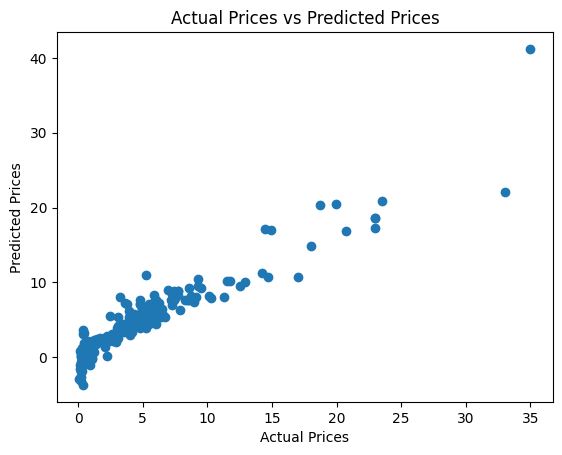

In [49]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [50]:
# prediction on testing data
test_data_prediction = lr.predict(X_test)

In [51]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8191909743726024


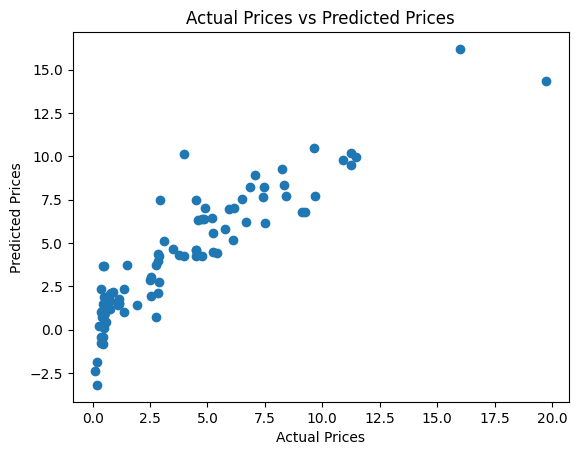

In [52]:
# plotting graph
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression Model

In [53]:
from sklearn.linear_model import Lasso


In [54]:
ls = Lasso()

In [55]:
ls.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [56]:
# prediction on Training data
train_data_prediction = ls.predict(X_train)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8438059049440154


Visualize the actual prices and predicted prices

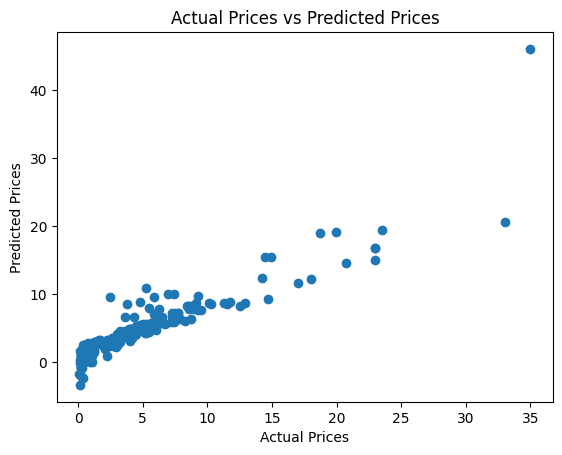

In [58]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [59]:
# prediction on testing data
test_data_prediction = ls.predict(X_test)

In [60]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.842789961740593


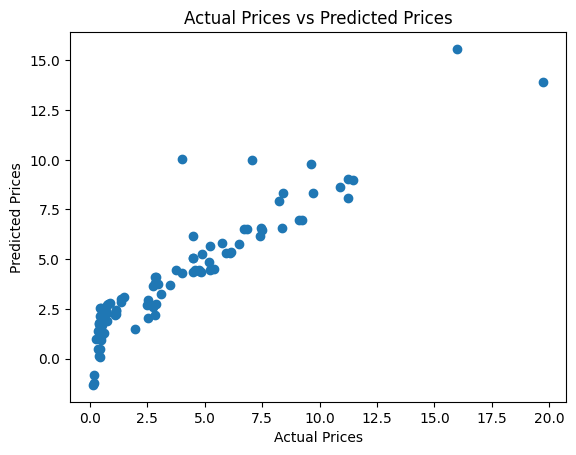

In [61]:
# plotting graph
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()